# Importing Necessary Libraries

In [1]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import *
from dateutil.easter import *
from dateutil.rrule import *
from dateutil.parser import *
from datetime import *
%matplotlib inline

# Setting path For file

In [2]:
try:
    pathMapping= r'loan.csv'
except Exception as ex:
    print(ex)

# Reading the File and Data Cleaning

In [3]:
try:
    loanDataset= pd.read_csv(pathMapping,low_memory=False)
    pd.options.display.max_columns = None
    print("Successfully Imported")
except Exception as ex:
    print(ex)

Successfully Imported


In [4]:
loanDataset.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
loanDataset.shape

(39717, 111)

In [6]:
loanDataset.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
try:
    #Removing all coulumn and rows where all values are null (missing value) 
    loanDataset.dropna(axis=1,how='all',inplace=True)
    loanDataset.dropna(axis=0,how='all',inplace=True)

    
    #Removing % from int_rate
    loanDataset['int_rate']=loanDataset['int_rate'].str.replace('%','')
    
    #Cleaning emp_length to valid values
    loanDataset['emp_length']=loanDataset['emp_length'].apply(lambda x: '0' if '<' in str(x) else x)
    loanDataset['emp_length'].fillna(-1)
    loanDataset['emp_length']=loanDataset['emp_length'].str.extract('(\d+)')#.astype(int)
    
    #droping columns where there are more then 90% null values or only a single value.
    loanDataset=loanDataset.drop(loanDataset.loc[:,list((100*(loanDataset.isnull().sum()/len(loanDataset.index))>90))].columns, 1)
    loanDataset=loanDataset.drop(loanDataset.loc[:,list(loanDataset.nunique()==1)].columns, 1)
    
    print("After Removal of all rows and column where >90% data is NULL, Shape of dataset:")
    print(loanDataset.shape)
    
    
except Exception as ex:
    print(ex)

After Removal of all rows and column where >90% data is NULL, Shape of dataset:
(39717, 46)


# Obtaining Derived Metrics:

In [8]:
# Obtaining the length of descriptions:
loanDataset['desc_len']=loanDataset['desc'].str.len()

In [9]:
#Obtaining Date from issue_d
tempTable=loanDataset['issue_d'].str.split("-", expand = True)
loanDataset['issue_month']=tempTable[0]
loanDataset['issue_year']=tempTable[1]

In [10]:
# Creating derived variables for last_payment_d
tempTable_lastpaydt=loanDataset['last_pymnt_d'].str.split("-", expand = True)
loanDataset['last_pymnt_yr']=tempTable_lastpaydt[1]
loanDataset['last_pymnt_month']=tempTable_lastpaydt[0]

In [11]:
#Getting the zipcode fixed, removing its last two characters:
loanDataset['zip_code_clean']=loanDataset['zip_code'].apply(lambda x: x[0:-2])
loanDataset['zip_code_clean'].nunique()

823

Removing text columns where there is data redundancy, and irrelevant data

In [12]:
try:
    #dropping url cloumn as its irrelevant( 'url','desc','title') comments but we dont have means to do sentiment analysis yet.
    loanDataset.drop(['url','title','desc'],axis=1,inplace=True)
    loanDataset.drop(['member_id'],axis=1,inplace=True)
    print("After Removal of all text data columns, Shape of dataset:")
    print(loanDataset.shape)
except Exception as ex:
    print(ex)

After Removal of all text data columns, Shape of dataset:
(39717, 48)


End of Data Cleaning

# Starting Univariate Analysis

In [13]:
try:
    noOfUniqueValues=loanDataset.nunique()
    print(noOfUniqueValues)
except Exception as ex:
    print(ex)

id                         39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
purpose                       14
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc                     82
out_prncp                   1137
out_prncp_

In [14]:
try:
    uniqueValuesOfEachColumn= {}
    for x in list(loanDataset.columns):
        uniqueValuesOfEachColumn[x]=loanDataset[x].unique()
except Exception as ex:
    print(ex)

In [15]:
try:
    #Grouping all the coulmns with loan_status
    groupedByList={}
    for x in list(loanDataset.columns):
        if(x != 'loan_status'):
            groupedByList[x]=loanDataset.groupby([x,"loan_status"])
        else:
            groupedByList['loan_status']=loanDataset.groupby(["loan_status"])
except Exception as ex:
    print(ex)

Count of Loan status vs the loan amount

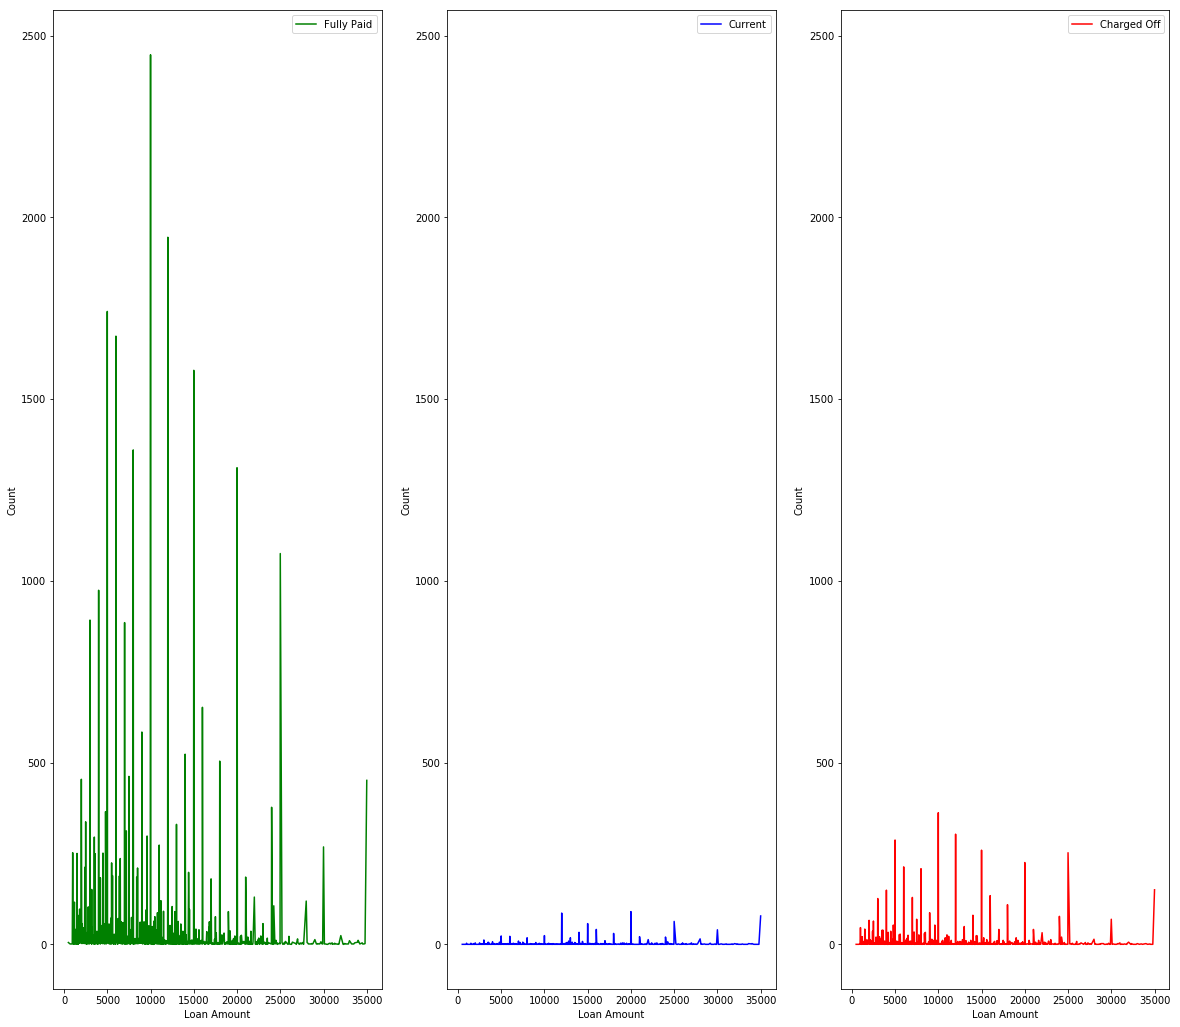

In [16]:
unstackedPivot=groupedByList['loan_amnt'].size().unstack().fillna(0)
plt.figure(figsize=(20,18))
#plt.set_ylim()
ax1=plt.subplot(131)
plt.plot(unstackedPivot['Fully Paid'], marker='', color='green', label="Fully Paid")
plt.ylabel('Count')
plt.xlabel('Loan Amount')
plt.legend()
ax2=plt.subplot(132, sharex=ax1, sharey=ax1)
plt.plot(unstackedPivot['Current'], marker='', color='blue', label="Current")
plt.ylabel('Count')
plt.xlabel('Loan Amount')
plt.legend()
ax3=plt.subplot(133, sharex=ax1, sharey=ax1)
plt.plot(unstackedPivot['Charged Off'], marker='', color='red',label="Charged Off")
plt.ylabel('Count')
plt.xlabel('Loan Amount')

plt.legend()

It can be observed that more people take loans of small amounts, and thus this range has higher denstiy of being charged off. However the plots dont provide any insight other then this.

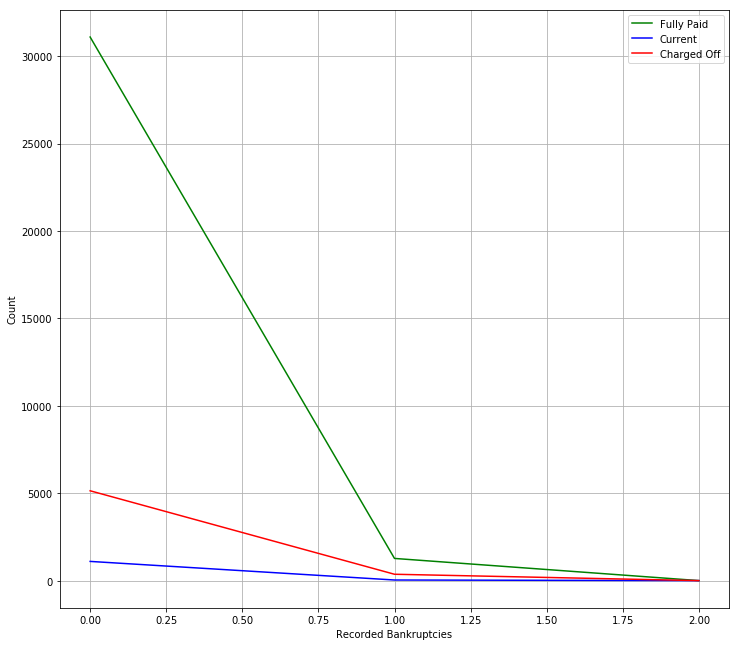

In [17]:
unstackedPivot=groupedByList['pub_rec_bankruptcies'].size().unstack().fillna(0)
plt.figure(figsize=(12,11))
plt.plot(unstackedPivot['Fully Paid'], marker='', color='green', label="Fully Paid")
plt.plot(unstackedPivot['Current'], marker='', color='blue', label="Current")
plt.plot(unstackedPivot['Charged Off'], marker='', color='red',label="Charged Off")
plt.ylabel('Count')
plt.xlabel('Recorded Bankruptcies')
plt.grid()
plt.legend()

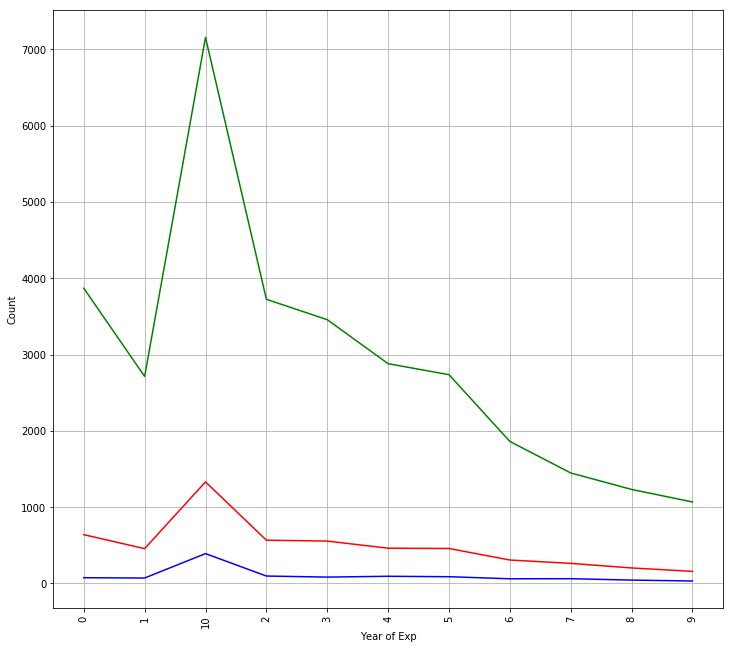

In [18]:
unstackedPivot=groupedByList['emp_length'].size().unstack().fillna(0)
plt.figure(figsize=(12,11))
plt.plot(unstackedPivot['Fully Paid'], marker='', color='green', label="Fully Paid")
plt.plot(unstackedPivot['Current'], marker='', color='blue', label="Current")
plt.plot(unstackedPivot['Charged Off'], marker='', color='red',label="Charged Off")
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Year of Exp')
plt.grid()

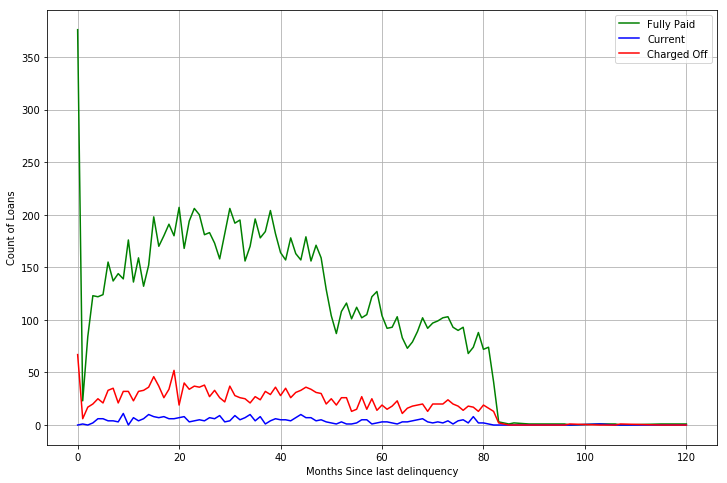

In [19]:
unstackedPivot=groupedByList['mths_since_last_delinq'].size().unstack().fillna(0)
plt.figure(figsize=(12,8))
#plt.set_ylim()
#ax1=plt.subplot(131)
plt.plot(unstackedPivot['Fully Paid'], marker='', color='green', label="Fully Paid")
plt.plot(unstackedPivot['Current'], marker='', color='blue', label="Current")
plt.plot(unstackedPivot['Charged Off'], marker='', color='red',label="Charged Off")
plt.ylabel('Count of Loans')
plt.xlabel('Months Since last delinquency')
plt.grid()
plt.legend()




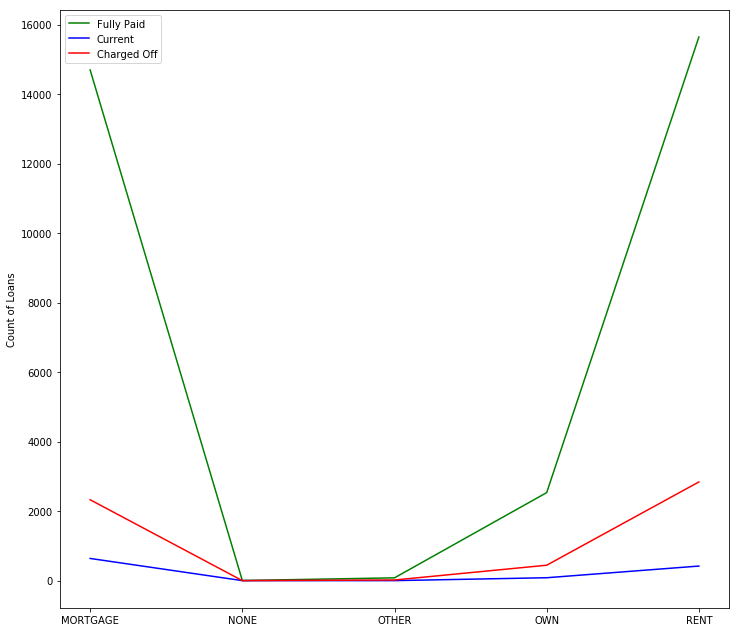

In [20]:
unstackedPivot=groupedByList['home_ownership'].size().unstack().fillna(0)
plt.figure(figsize=(12,11))
plt.plot(unstackedPivot['Fully Paid'], marker='', color='green', label="Fully Paid")
plt.plot(unstackedPivot['Current'], marker='', color='blue', label="Current")
plt.plot(unstackedPivot['Charged Off'], marker='', color='red',label="Charged Off")
plt.ylabel('Count of Loans')
plt.legend()

In [21]:
# Checking the ratio of counts in terms of percent of 
ownership_check = groupedByList['home_ownership'].agg({'home_ownership': 'count'})
ownership_check1 = ownership_check.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).unstack().fillna("--")
ownership_check1

home_ownership                     
loan_status       Charged Off  Current  Fully Paid
home_ownership                                    
MORTGAGE              13.1774  3.61289   83.209695
NONE                       --       --  100.000000
OTHER                 18.3673       --   81.632653
OWN                   14.4866  2.71419   82.799215
RENT                   15.022  2.21705   82.760993

The loan count and the ratio is almost same for all categories of "Home Ownership". 
So, it is NOT a driving factor.

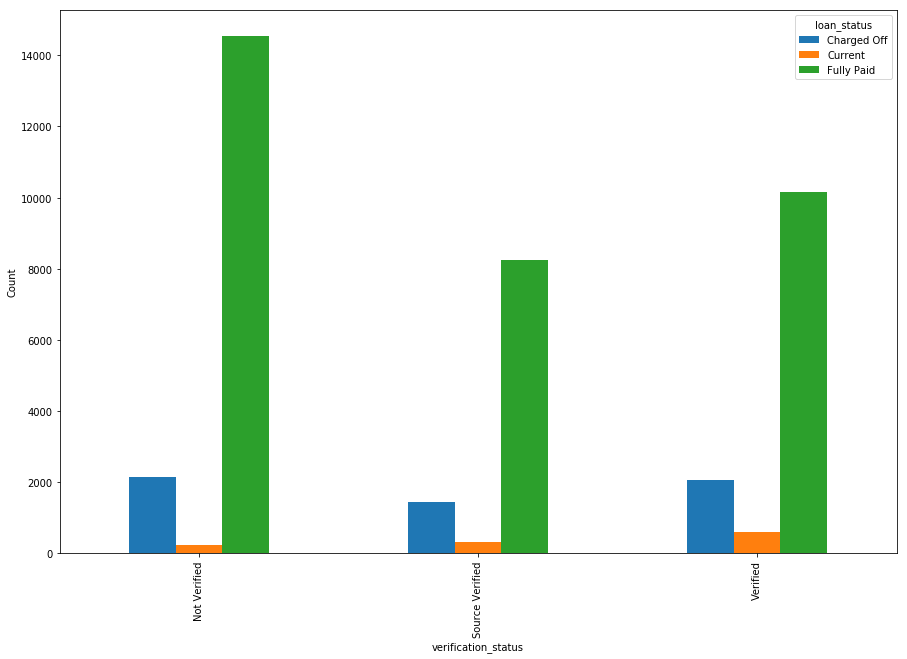

In [22]:
groupedByList['verification_status']['id'].size().unstack().plot(kind='bar',stacked=False,figsize=(15,10))
plt.ylabel("Count")
plt.show()

In [23]:
verification_check = groupedByList['verification_status'].agg({'verification_status': 'count'})
verification_check1 = verification_check.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).unstack()
verification_check1

verification_status                     
loan_status                 Charged Off   Current Fully Paid
verification_status                                         
Not Verified                  12.658826  1.341528  85.999645
Source Verified               14.358666  3.104035  82.537298
Verified                      16.012179  4.707627  79.280194

**verification_status** is a driving factor. Most of the verified statused loans get charged off.

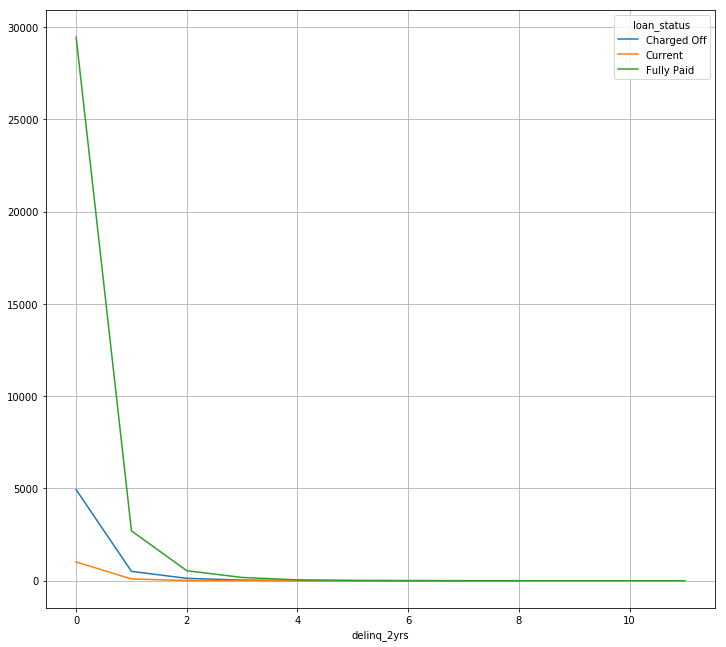

In [24]:
groupedByList['delinq_2yrs'].size().unstack().plot(figsize=(12,11))
plt.grid()

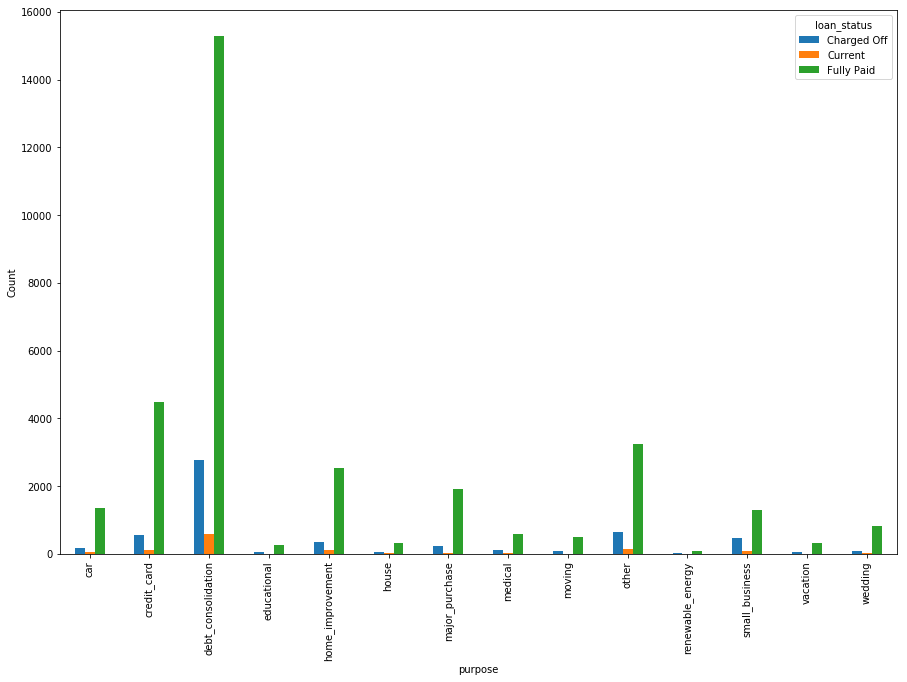

In [25]:
groupedByList['purpose']['id'].size().unstack().plot(kind='bar',stacked=False,figsize=(15,10))
plt.ylabel("Count")
plt.show()

In [26]:
# Check in Percentage of row total
purpose_check = groupedByList['purpose'].agg({'purpose': 'count'})
purpose_check1 = purpose_check.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).unstack()
purpose_check1

purpose                     
loan_status        Charged Off   Current Fully Paid
purpose                                            
car                  10.329245  3.227889  86.442866
credit_card          10.565302  2.007797  87.426901
debt_consolidation   14.843624  3.143608  82.012768
educational          17.230769       NaN  82.769231
home_improvement     11.659946  3.393817  84.946237
house                15.485564  3.674541  80.839895
major_purchase       10.150892  1.691815  88.157293
medical              15.295815  1.731602  82.972583
moving               15.780446  1.200686  83.018868
other                15.852742  3.205610  80.941648
renewable_energy     18.446602  0.970874  80.582524
small_business       25.984683  4.048140  69.967177
vacation             13.910761  1.574803  84.514436
wedding              10.137276  2.217529  87.645195

**purpose** is a driving factor behind loan default.
Result: "Small Bussinesses" have high ratio of Defaulters. It is risky to invest in them.
        Whereas "Debt Consolidation" has the highest number of loans and has comparitively less Defaulters ratio.

(array([137., 142., 147., 265., 211., 142., 392., 270., 217., 134., 305.,
        150., 109., 411.,  81.,  74., 327.,  97.,  65., 151., 269.,  68.,
        157.,  79.,  39., 139.,  52.,  30., 228.,  57.,  56.,  17.,  35.,
         73.,  24., 211.,  16.,   9.,   9.,  18.,   1.,   4.,  61.,   2.,
          5.,   5.,   2.,   2.,   4., 128.]),
 array([  900.,  1582.,  2264.,  2946.,  3628.,  4310.,  4992.,  5674.,
         6356.,  7038.,  7720.,  8402.,  9084.,  9766., 10448., 11130.,
        11812., 12494., 13176., 13858., 14540., 15222., 15904., 16586.,
        17268., 17950., 18632., 19314., 19996., 20678., 21360., 22042.,
        22724., 23406., 24088., 24770., 25452., 26134., 26816., 27498.,
        28180., 28862., 29544., 30226., 30908., 31590., 32272., 32954.,
        33636., 34318., 35000.]),
 <a list of 50 Patch objects>)

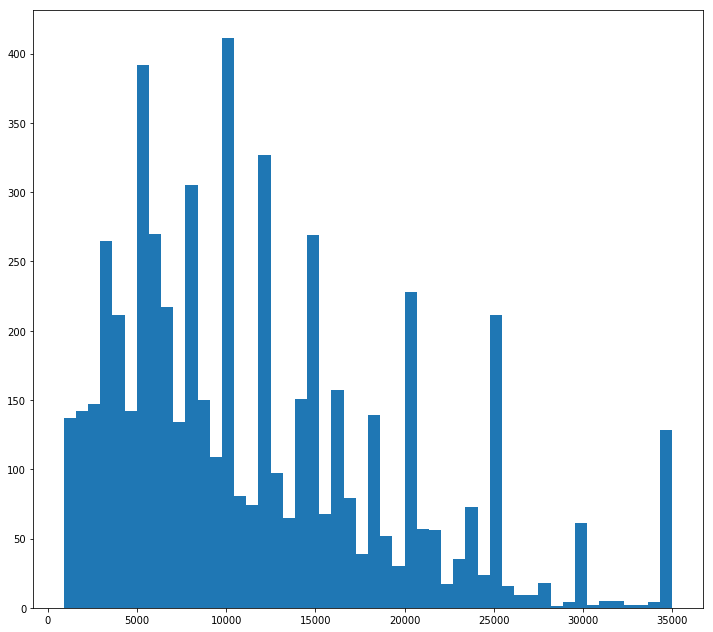

In [27]:
'''
The below graph suggests most of the Charged Off loans happen to lie within 25000.
'''
charged_off_dist = loanDataset.loc[(loanDataset['loan_status']=='Charged Off'),['funded_amnt']]
count_charged_off = loanDataset.loc[(loanDataset['loan_status']=='Charged Off'),['funded_amnt']].count()
plt.figure(figsize=(12,11))
plt.hist(charged_off_dist['funded_amnt'],bins=50)

In [28]:
#Let us also see 95% of the charged off loans is what amount
charged_off_dist.quantile(0.95)

funded_amnt    25000.0
Name: 0.95, dtype: float64

(array([ 275.,  702., 1221., 1360.,  760., 1647., 2452., 2356.,  824.,
        1426., 2070.,  588.,  941., 2965.,  470.,  639., 2012.,  439.,
         607.,  674.,  417., 1724.,  724.,  367.,  186.,  573.,  180.,
         120., 1247.,  219.,  103.,  188.,  104.,   57.,  425.,  899.,
          52.,   15.,   33.,  122.,   14.,   28.,  259.,    8.,   13.,
          29.,    6.,   16.,   15.,  379.]),
 array([  500.,  1190.,  1880.,  2570.,  3260.,  3950.,  4640.,  5330.,
         6020.,  6710.,  7400.,  8090.,  8780.,  9470., 10160., 10850.,
        11540., 12230., 12920., 13610., 14300., 14990., 15680., 16370.,
        17060., 17750., 18440., 19130., 19820., 20510., 21200., 21890.,
        22580., 23270., 23960., 24650., 25340., 26030., 26720., 27410.,
        28100., 28790., 29480., 30170., 30860., 31550., 32240., 32930.,
        33620., 34310., 35000.]),
 <a list of 50 Patch objects>)

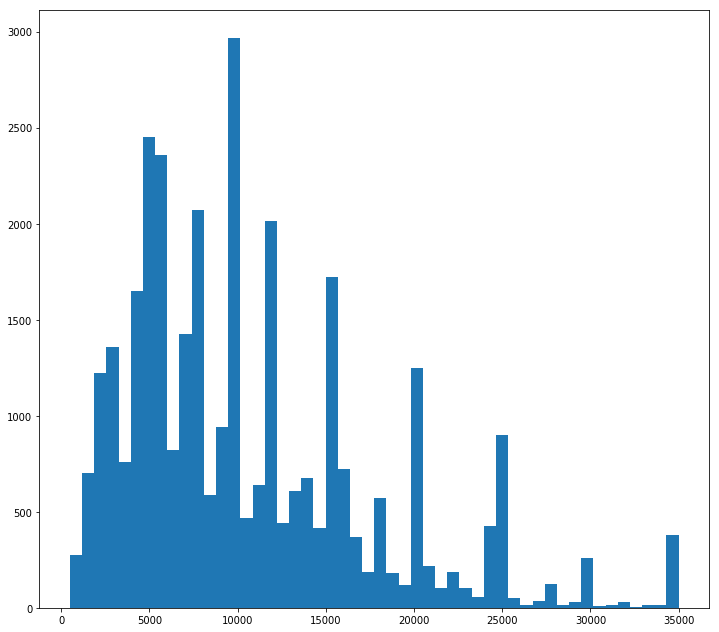

In [29]:
fully_paid_dist = loanDataset.loc[(loanDataset['loan_status']=='Fully Paid'),['funded_amnt']]
count_fully_paid = loanDataset.loc[(loanDataset['loan_status']=='Fully Paid'),['funded_amnt']].count()
plt.figure(figsize=(12,11))
plt.hist(fully_paid_dist['funded_amnt'], bins=50)

In [30]:
fully_paid_dist.quantile(0.95)

funded_amnt    25000.0
Name: 0.95, dtype: float64

Based on this understand, let us also create bins for funded_amnt that can be sed later for finer analysis of data.

In [31]:
def funded_amnt_bin(x):
    bin =0
    if x<= 5000:
        bin = 5000
    elif x<=10000:
        bin = 10000
    elif x<=15000:
        bin = 15000
    elif x<=20000:
        bin =20000
    elif x<=25000:
        bin= 25000
    elif bin<=30000:
        bin=30000
    else:
        bin=35000
    return bin

loanDataset['funded_amnt_bin']=loanDataset['funded_amnt'].apply(funded_amnt_bin)
loanDataset['funded_amnt_bin'].unique()


array([ 5000, 10000, 15000, 25000, 30000, 20000], dtype=int64)

**Conclusion: Both Charged Off loans and Fully Paid loans show similar trends for funded_amnts. More loans are given in multiple of 5K i.e. 5K, 10K, 15K upto 35K.*However since there is no difference between these two plots, funded_amnt does not give any clear indication of default*.**

 **total_rec_prncp** : we created a derived variable to calculate proportion of principal paid to the overall principal. It will be 1.0 for all Fully Paid loans. For Charged off loans, it will be less than 1.0 since full principal payment happens at the very end of the scheduled tenure.

In [32]:
loanDataset['proportion_rec_prncp'] = round(loanDataset['total_rec_prncp']/loanDataset['funded_amnt'],2)
#check for Fully Paid loans. This must come to 1.0 for all Fully Paid loans.
loanDataset.loc[(loanDataset['loan_status']=='Fully Paid'),['proportion_rec_prncp']].mean()
'''
Now for Charged Off loans the summary metrics of this variable are given below. 

Here, we can see the mean (0.35) and median (0.31) are not very spread from each other. This means the values are uniformly 
distributed and there is potentially no skew. 

However, values vary from 0.0 to 0.99 - so no definite conclusion can be made just by using these statistics. So, let us 
analyze distribution plots to draw more insights
'''
(loanDataset.groupby('loan_status'))['proportion_rec_prncp'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,0.355408,0.245686,0.0,0.15,0.31,0.53,0.99
Current,1140.0,0.896018,0.049384,0.8,0.85,0.89,0.93,1.00
Fully Paid,32950.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.00


,count,mean,std,min,25%,50%,75%,max
funded_amnt_bin,,,,,,,,
5000,1331.0,0.384290,0.264513,0.0,0.15,0.34,0.5850,0.99
10000,1664.0,0.377734,0.245763,0.0,0.17,0.34,0.5600,0.98
15000,1092.0,0.341813,0.239564,0.0,0.14,0.29,0.4925,0.99
20000,778.0,0.323843,0.227547,0.0,0.13,0.27,0.4900,0.98
25000,490.0,0.319408,0.223088,0.0,0.14,0.27,0.4700,0.97
30000,272.0,0.287206,0.228068,0.0,0.10,0.22,0.4425,0.97


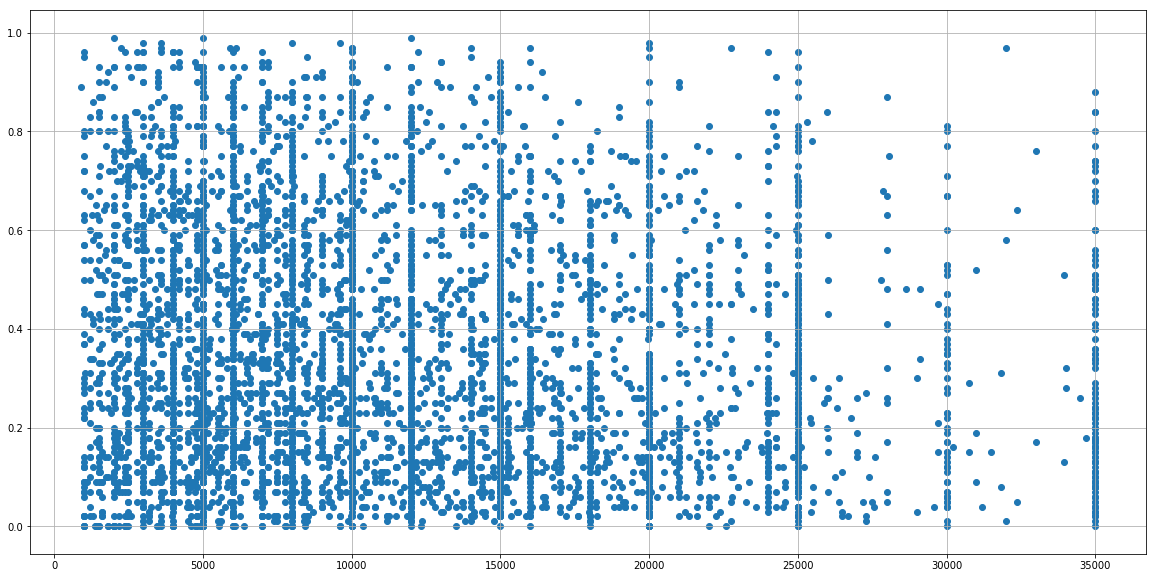

In [33]:
'''
Let us also make plots to see the distribution of this variable to derive more insights. By plotting the scatter plot across
different funded amounts to see whether amounts had an impact on the proportion of principal paid. 
'''
proportion_rec_prncp_dist =loanDataset.loc[(loanDataset['loan_status']=='Charged Off'),['proportion_rec_prncp','funded_amnt']]
plt.figure(figsize=(20,10))
plt.grid()
plt.scatter(proportion_rec_prncp_dist['funded_amnt'],proportion_rec_prncp_dist['proportion_rec_prncp'])
(loanDataset.loc[(loanDataset['loan_status']=='Charged Off')]).groupby('funded_amnt_bin')['proportion_rec_prncp'].describe() 

In [34]:
'''
Running a correlation between proportion_rec_prncp & funded_amnt also shows only a small negative. But it does not
seem suggestive enough to make a conclusive decision on its impact on default loan. 
This corroborates the scatter graph shown above.
'''
proportion_rec_prncp_dist.corr()

,proportion_rec_prncp,funded_amnt
proportion_rec_prncp,1.000000,-0.110612
funded_amnt,-0.110612,1.000000


**Conclusion: As one can see, from the above plot, across different funded amounts, the proportion of principal paid is uniformly distributed from 0 to 1. There is no typical value that can be used to signal a default. Hence it does not tell us much. Though the proportion seems to slightly reduce with the increase in funded_amnt, the correlation is not strong enough (only -0.11). Hence this ratio does not signal us much.**

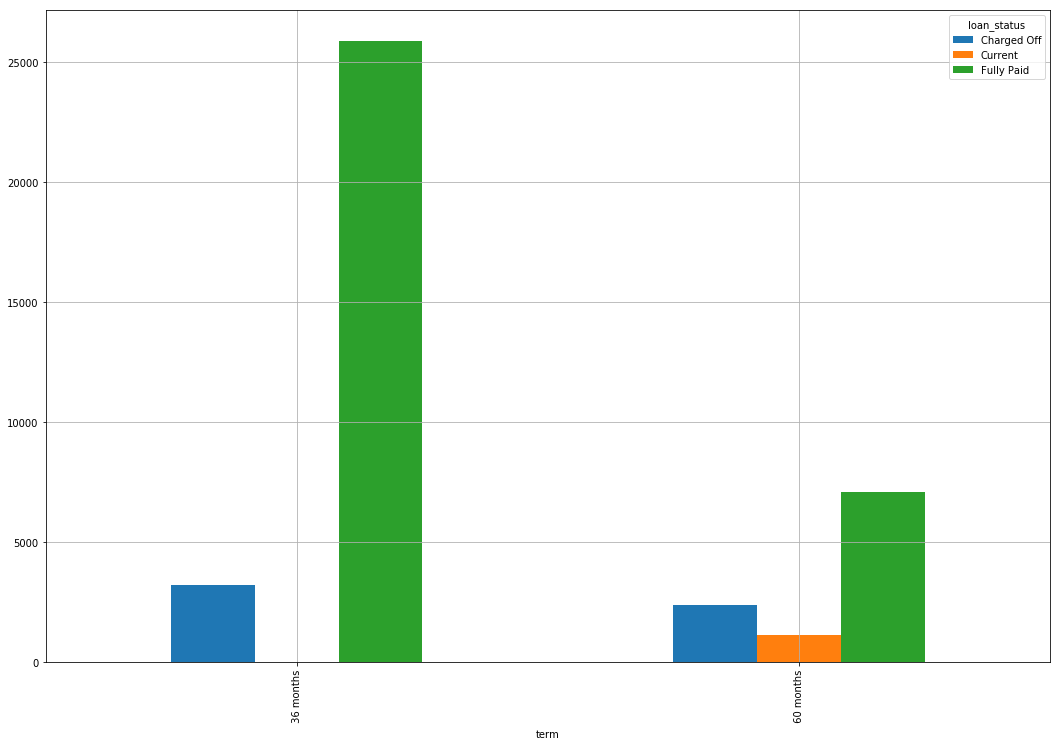

In [35]:
groupedByList['term'].size().unstack().plot(kind='bar',stacked=False,rot=90,figsize=(18,12))
plt.grid()

We can see that those with 36 months as the **term** have low ratio of charged off to fully paid loans, where as those with 60 months as the **term** the ratio is obviously higher.

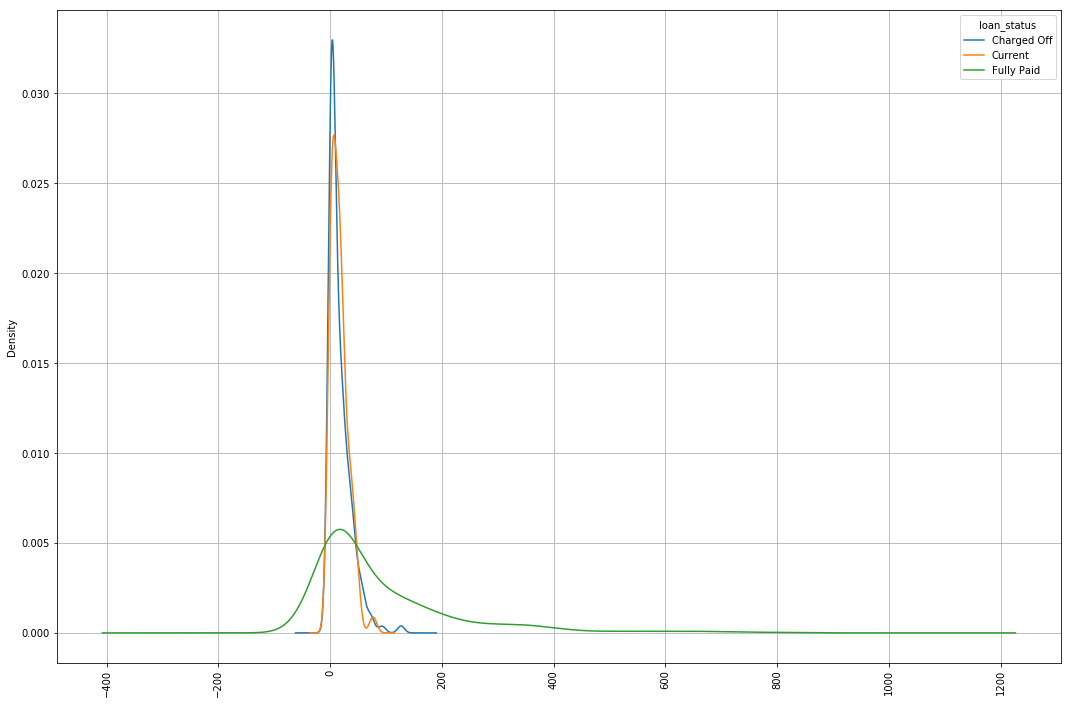

In [36]:
groupedByList['int_rate'].size().unstack().plot(kind='kde',stacked=False,rot=90,figsize=(18,12))
plt.grid()

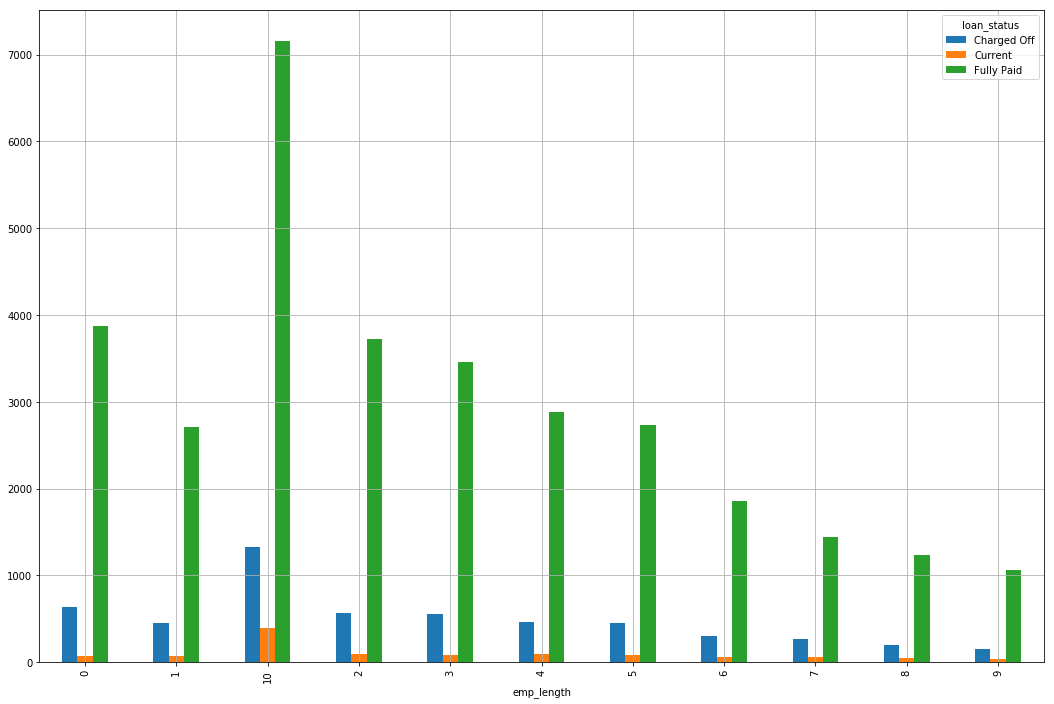

In [37]:
groupedByList['emp_length'].size().unstack().plot(kind='bar',stacked=False,rot=90,figsize=(18,12))
plt.grid()

loan_status  Charged Off   Current  Fully Paid
emp_length                                    
0              13.942832  1.636483   84.420685
1              14.074074  2.191358   83.734568
10             14.990427  4.403649   80.605924
2              12.921604  2.210574   84.867821
3              13.553114  2.026862   84.420024
4              13.445867  2.735739   83.818393
5              13.954906  2.681292   83.363803
6              13.772992  2.736653   83.490354
7              14.833615  3.496898   81.669487
8              13.725490  2.974983   83.299527
9              12.559618  2.543720   84.896661


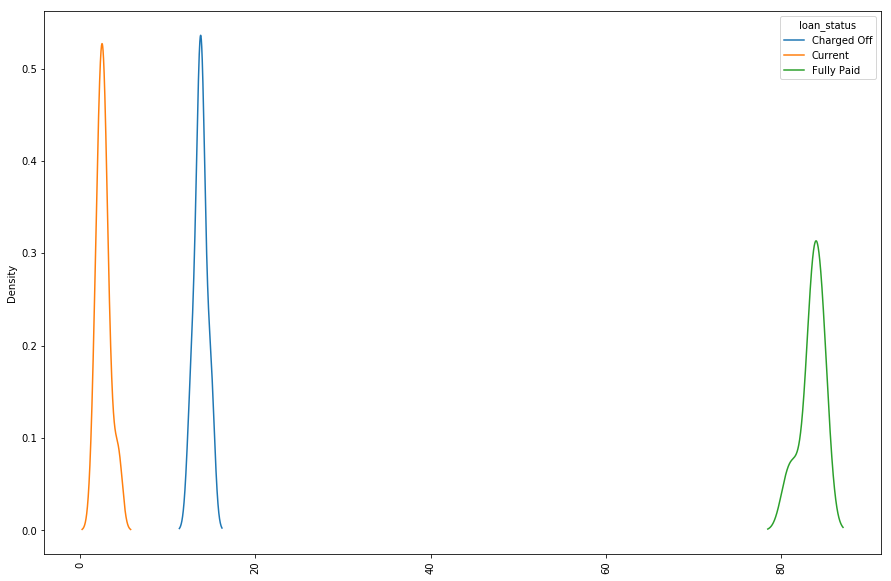

In [38]:
empexp_check = groupedByList['emp_length'].size()
empexp_check = empexp_check.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).unstack()
empexp_check.transpose().fillna('--')
print(empexp_check)
empexp_check.plot(kind='kde',rot=90,figsize=(15,10))

We can see that those with experience of 10 or more years have taken more loans, and have charged off the maximum times. However the distribution of their percentages are quite different for charged off and fully paid loans. We can conclude that the **emp_length** has a certain effect on loan status. From those with less and more experience the ratio of charged off to fully paid is low, where as for those in intermediate  phases the ratios are high.

In [39]:
# Check in Percentage of row total
zipcode_check = groupedByList['zip_code_clean'].agg({'zip_code_clean': 'count'})
zipcode_check = zipcode_check.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).unstack()
zipcode_check.transpose().fillna('--')

zip_code_clean              007   010      011        012        013  \
               loan_status                                             
zip_code_clean Charged Off   --  14.0  7.14286   7.142857  21.428571   
               Current       --   2.0       --   7.142857   7.142857   
               Fully Paid   100  84.0  92.8571  85.714286  71.428571   

zip_code_clean                    014        015        016      017  \
               loan_status                                             
zip_code_clean Charged Off  21.212121  16.129032   4.166667  6.32911   
               Current       3.030303   1.612903   4.166667       --   
               Fully Paid   75.757576  82.258065  91.666667  93.6709   

zip_code_clean                    018        019        020        021  022  \
               loan_status                                                    
zip_code_clean Charged Off  13.432836  13.414634  13.432836   8.564232   --   
               Current       2.985075   3.658537   4.477612   3.526448   --   
               Fully Paid   83.582090  82.926829  82.089552  87.909320  100   

zip_code_clean                    023        024        025        026  \
               loan_status                                               
zip_code_clean Charged Off  15.662651   8.510638  14.285714  29.166667   
               Current       3.614458   4.255319   4.761905   4.166667   
               Fully Paid   80.722892  87.234043  80.952381  66.666667   

zip_code_clean                    027        028      029        030      031  \
               loan_status                                                      
zip_code_clean Charged Off  13.978495  13.475177  10.7143  11.594203  19.2308   
               Current       3.225806   2.836879       --   5.797101       --   
               Fully Paid   82.795699  83.687943  89.2857  82.608696  80.7692   

zip_code_clean                  032 033 034      035      037      038  040  \
               loan_status                                                    
zip_code_clean Charged Off  13.3333  --  10  33.3333  22.2222  17.1429   --   
               Current           --  25  --       --       --       --   --   
               Fully Paid   86.6667  75  90  66.6667  77.7778  82.8571  100   

zip_code_clean              041  044      050  051  052      053      054 056  \
               loan_status                                                      
zip_code_clean Charged Off   --   --  16.6667   --   --  14.2857  13.0435  25   
               Current       --   --       --   --   --       --       --  --   
               Fully Paid   100  100  83.3333  100  100  85.7143  86.9565  75   

zip_code_clean             057  058        060        061        062  \
               loan_status                                             
zip_code_clean Charged Off  --   --  11.688312  12.500000  16.129032   
               Current      25   --   3.246753   7.142857   3.225806   
               Fully Paid   75  100  85.064935  80.357143  80.645161   

zip_code_clean                    063        064        065        066  \
               loan_status                                               
zip_code_clean Charged Off  11.764706  13.333333  20.754717  19.512195   
               Current       5.882353   0.666667   3.773585   2.439024   
               Fully Paid   82.352941  86.000000  75.471698  78.048780   

zip_code_clean                    067   068        069        070        071  \
               loan_status                                                     
zip_code_clean Charged Off   8.860759  11.0   2.702703  13.742072  18.367347   
               Current       3.797468   2.0   8.108108   3.805497   2.040816   
               Fully Paid   87.341772  87.0  89.189189  82.452431  79.591837   

zip_code_clean                    072        073        074      075   076  \
               loan_status                                                   
zip_code_clean

There is no significant change in ratios of defaulter and fully paid for zip_code column.
So, **zip_code** is not a  driving factor.

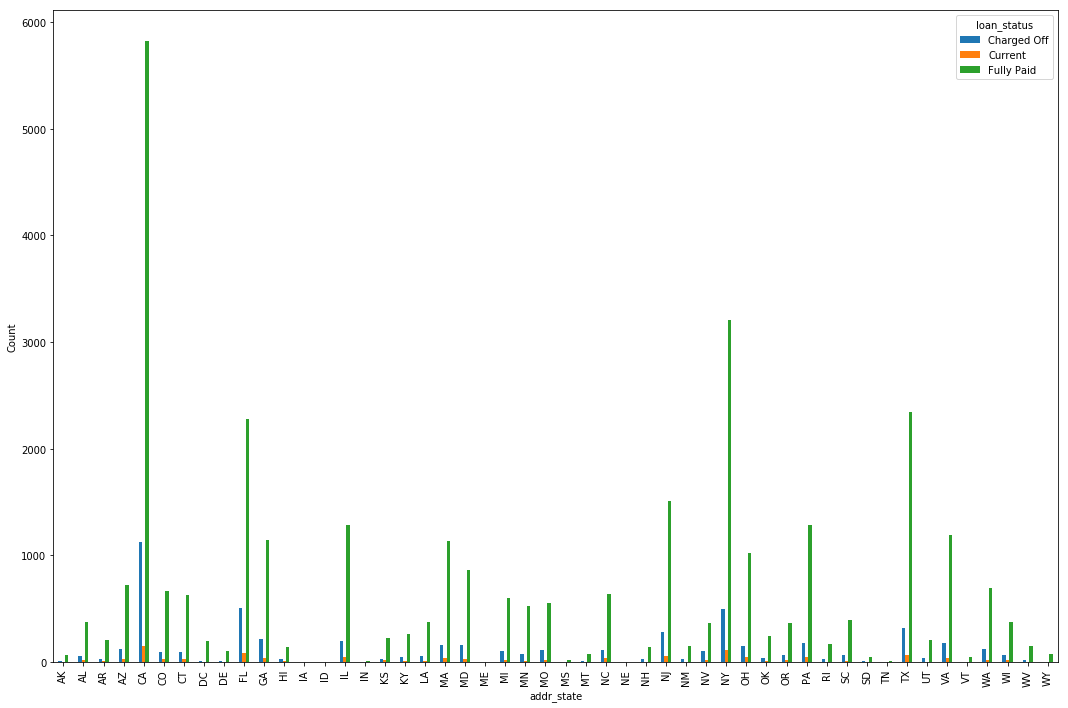

In [40]:
groupedByList['addr_state'].size().unstack().plot(kind='bar',stacked=False,figsize=(18,12))
plt.ylabel("Count")
plt.show()

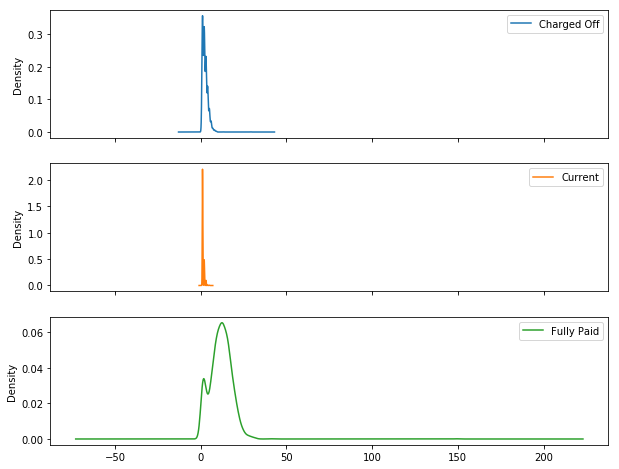

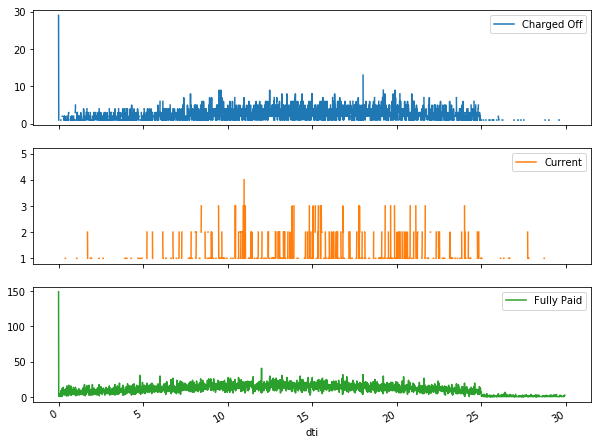

In [41]:
groupedByList['dti'].size().unstack().plot(kind='kde',stacked=False,figsize=(10,8),subplots=True)
groupedByList['dti'].size().unstack().plot(kind='line',stacked=False,figsize=(10,8),subplots=True)
plt.show()

**dti** column shows an increasing trend for the percentage of defaulters from 5 to 25. After which it stars decreasing. Therefore the higher dti range i.e. from 15 to 25 are more likely to default.

In [42]:
#let us first find the total interest to be paid by each consumer.
#For this, we first find the total interest payable i.e. term * installment - funded_amnt.

#For this we first calculate the numerical value of term:
loanDataset['term_value'] = loanDataset['term'].apply(lambda x:int(x.lstrip()[0:2]))

#Now find total interest payable
loanDataset['total_payable_int'] = loanDataset['term_value']*loanDataset['installment'] - loanDataset['funded_amnt']
loanDataset['proportion_rec_int'] = round(loanDataset['total_rec_int']/loanDataset['total_payable_int'],2)
print((loanDataset.groupby('loan_status'))['proportion_rec_int'].describe())

               count      mean       std   min   25%   50%   75%   max
loan_status                                                           
Charged Off   5627.0  0.568095  0.287749  0.00  0.33  0.58  0.82  1.91
Current       1140.0  0.988202  0.019850  0.92  0.98  0.99  0.99  1.46
Fully Paid   32950.0  0.817882  0.260811  0.03  0.70  0.96  1.00  2.81


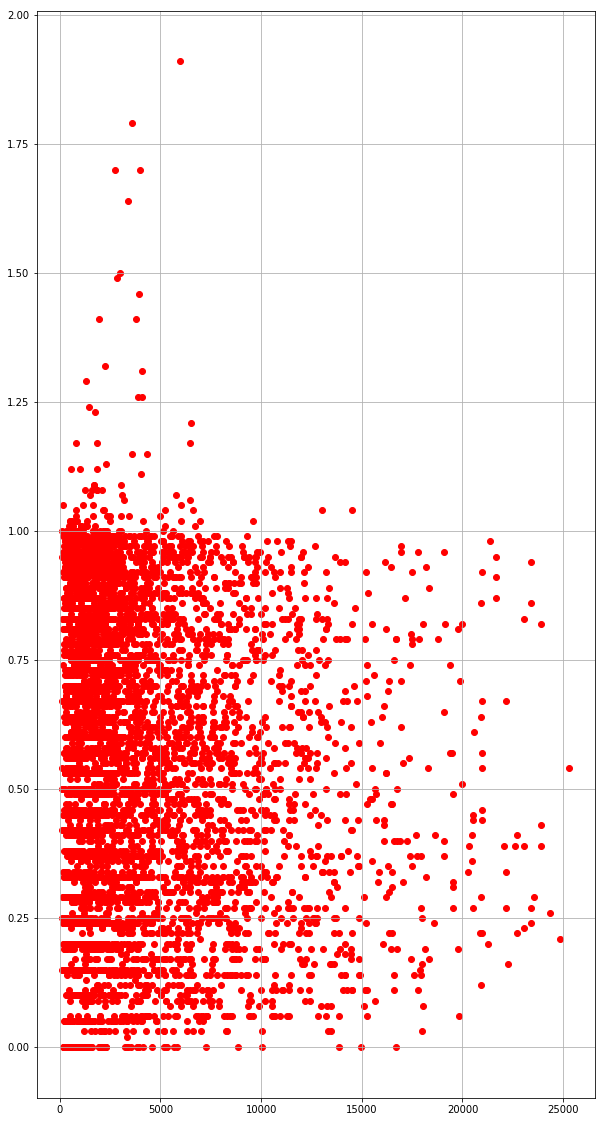

In [43]:
'''
The below graph has interesting insights. Above 5000, the total_rec_int by various defaulters is a uniform distribution
i.e. there is no specific pattern based inference. 
However, below a ticket size of 5000, we see defaulters are more startified across levels. Defaulters seem to pay the 
interest cover in discrete steps i.e. 0.01, 0.02 & so on till they have paid 0.5 of the total payable interest. 
It maybe interesting to use this to pro-actively engage with users of such ticket sizes.
'''

proportion_rec_int_dist =loanDataset.loc[(loanDataset['loan_status']=='Charged Off'),['proportion_rec_int','total_payable_int']]
plt.figure(figsize=(10,20))
plt.grid()
plt.scatter(proportion_rec_int_dist['total_payable_int'],proportion_rec_int_dist['proportion_rec_int'], c='red')

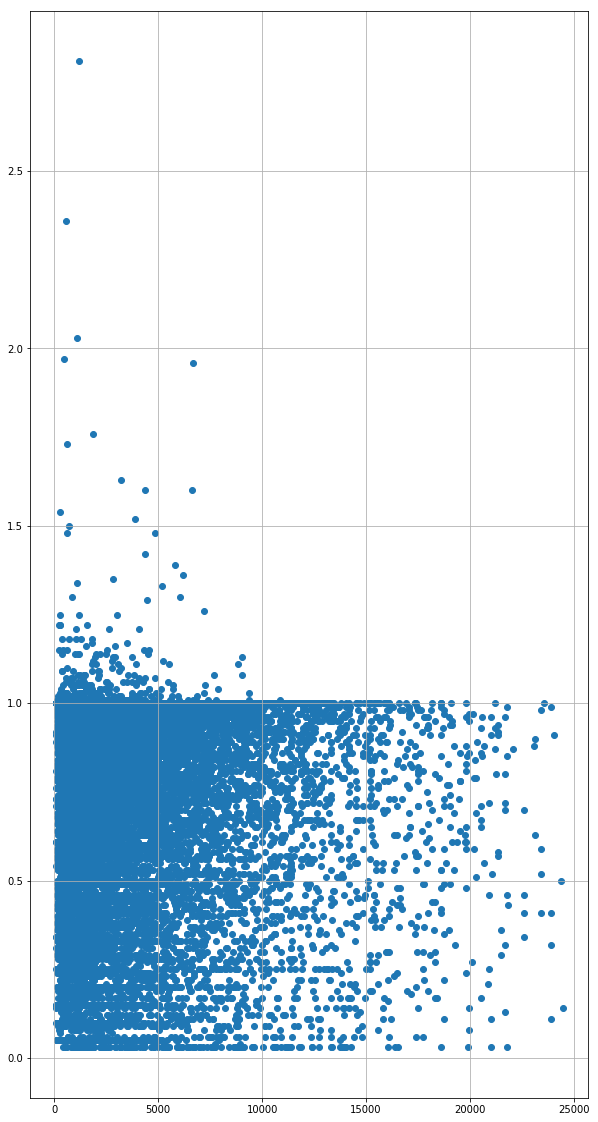

In [44]:
#Let us also compare how proportion of received interest is for Fully Paid loans
proportion_rec_int_dist =loanDataset.loc[(loanDataset['loan_status']=='Fully Paid'),['proportion_rec_int','total_payable_int']]
plt.figure(figsize=(10,20))
plt.grid()
plt.scatter(proportion_rec_int_dist['total_payable_int'],proportion_rec_int_dist['proportion_rec_int'])

In [45]:
proportion_rec_int_dist.corr()

,proportion_rec_int,total_payable_int
proportion_rec_int,1.000000,-0.144698
total_payable_int,-0.144698,1.000000


**Conclusion: specific pattern cant be inferred from the proportion of interest paid. The scatter plot is quite similar for both Fully Paid and Charged Off loans. 
However, for ticket size of 5000 and below, we see defaulters are more layered across levels. Defaulters seem to pay the 
interest cover in discrete steps i.e. 5%, 10% & so on till they have paid 50% of the total payable interest.**

In [46]:
groupedByList['last_pymnt_yr']['last_pymnt_yr'].describe().unstack().fillna('--')

count                         unique                     \
loan_status   Charged Off Current Fully Paid Charged Off Current Fully Paid   
last_pymnt_yr                                                                 
08                     45      --         92           1      --          1   
09                    228      --        331           1      --          1   
10                    513      --       1335           1      --          1   
11                   1036      --       3960           1      --          1   
12                   1682      --       7222           1      --          1   
13                   1219      --       8239           1      --          1   
14                    601      --       8668           1      --          1   
15                    218      --       2213           1      --          1   
16                     14    1140        890           1       1          1   

                      top                           freq                     
loan_status   Charged Off Current Fully Paid Charged Off Current Fully Paid  
last_pymnt_yr                                                                
08                     08      --         08          45      --         92  
09                     09      --         09         228      --        331  
10                     10      --         10         513      --       1335  
11                     11      --         11        1036      --       3960  
12                     12      --         12        1682      --       7222  
13                     13      --         13        1219      --       8239  
14                     14      --         14         601      --       8668  
15                     15      --         15         218      --       2213  
16                     16      16         16          14    1140        890

In [47]:
groupedByList['last_pymnt_month']['last_pymnt_yr'].describe().unstack().fillna('--')

count                         unique          \
loan_status      Charged Off Current Fully Paid Charged Off Current   
last_pymnt_month                                                      
Apr                      441      47       2716           8       1   
Aug                      457      --       2785           8      --   
Dec                      494      --       3018           8      --   
Feb                      422      --       2789           8      --   
Jan                      433      --       2608           8      --   
Jul                      519      --       2707           8      --   
Jun                      462      --       2471           8      --   
Mar                      430      --       3331           9      --   
May                      456    1093       2736           8       1   
Nov                      426      --       2519           8      --   
Oct                      542      --       2729           8      --   
Sep                      474      --       2541           8      --   

                                    top                           freq  \
loan_status      Fully Paid Charged Off Current Fully Paid Charged Off   
last_pymnt_month                                                         
Apr                       9          12      16         13         126   
Aug                       8          12      --         14         150   
Dec                       8          11      --         14         129   
Feb                       9          12      --         13         148   
Jan                       9          13      --         14         125   
Jul                       8          12      --         14         164   
Jun                       8          12      --         14         151   
Mar                       9          12      --         13         137   
May                       9          12      16         13         129   
Nov                       8          12      --         12         131   
Oct                       8          12      --         14         177   
Sep                       8          12      --         14         127   

                                     
loan_status      Current Fully Paid  
last_pymnt_month                     
Apr                   47        729  
Aug                   --        799  
Dec                   --        900  
Feb                   --        759  
Jan                   --        756  
Jul                   --        776  
Jun                   --        710  
Mar                   --        935  
May                 1093        793  
Nov                   --        609  
Oct                   --        769  
Sep                   --        649

**Conclusion: It can be clearly seen that in cases of Charged Off loans, most last_pymnt_d fell between 10th-13th of the month. In case of Fully Paid loans, most last_pymnt_d fell between 13th-15th of the month. This is a very strong indicator of possible defaults / Charge Offs. However, month does not seem a big indicator since it follows the same trend for both Fully Paid and Charged off loans.**

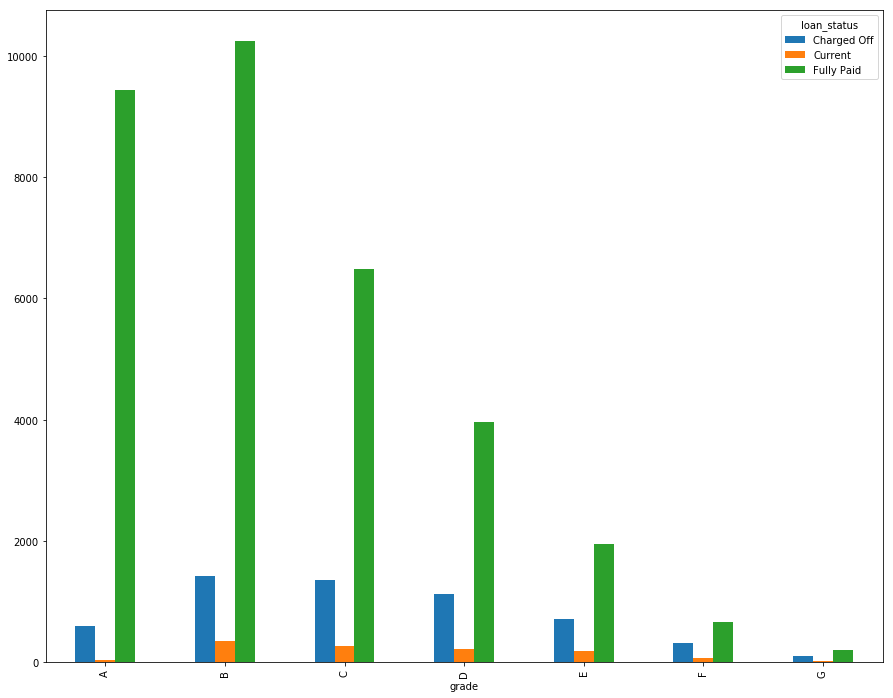

In [48]:
groupedByList['grade'].size().unstack().plot(kind='bar',figsize=(15,12))

It can be seen that loans with **grade** as A have very low ratio of charged off to fully paid loans. Whereas G, F, E, D,C have an increasing ratio,indicating that loans in these grades tend to be defaulted more. 

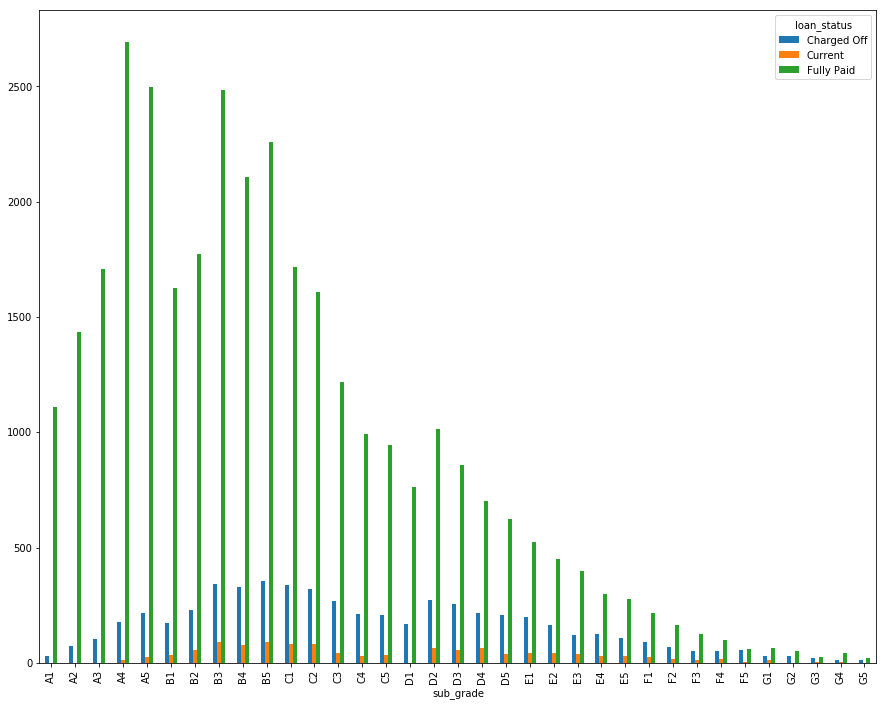

In [49]:
groupedByList['sub_grade'].size().unstack().plot(kind='bar',figsize=(15,12))

It can be seen that loans with **sub_grade** in A have very low ratio of charged off to fully paid loans. The ratio then varies for other sub grades, For G sub groups the ratio are very high. And the ratio increases starting from D2. 
Thus Grades and Sub Grades can be a driving factor towards deciding the loan to be charged off.

In [50]:
for_fully_paid = round(loanDataset.loc[(loanDataset['loan_status']=='Fully Paid')&(loanDataset['last_pymnt_amnt']<loanDataset['installment']),['funded_amnt']].count()/count_fully_paid,3)
for_charged_off = round(loanDataset.loc[(loanDataset['loan_status']=='Charged Off')&(loanDataset['last_pymnt_amnt']<loanDataset['installment']),['funded_amnt']].count()/count_charged_off,3)

In [51]:
'''
We see that for Fully Paid cases, ~10% of the instances last_pymnt_amnt < installement.
However, for Charged Off cases, ~18% of the instances last_pymnt_amnt < installement.
This is a significant difference between the two. So we can analyze this attribute further for more insights.
'''
for_fully_paid, for_charged_off

(funded_amnt    0.097
 dtype: float64, funded_amnt    0.184
 dtype: float64)

In [52]:
'''
Extending the above analysis, we will find the mean/median of such cases for both Fully Paid and Charged Off. 
If we run the below, we see such cases are more prominent for higher ticket sizes
'''
loanDataset.loc[(loanDataset['loan_status']=='Fully Paid')&(loanDataset['last_pymnt_amnt']<loanDataset['installment']),['funded_amnt']].describe()

,funded_amnt
count,3200.000000
mean,10855.234375
std,6962.519053
min,800.000000
25%,5500.000000
50%,9600.000000
75%,15000.000000
max,35000.000000


In [53]:
loanDataset.loc[(loanDataset['loan_status']=='Charged Off')&(loanDataset['last_pymnt_amnt']<loanDataset['installment']),['funded_amnt']].describe()

,funded_amnt
count,1034.000000
mean,15063.902321
std,7854.351540
min,1000.000000
25%,9600.000000
50%,15000.000000
75%,20000.000000
max,35000.000000


**Conclusion: From the above, it seems if the ticket size is high (~15000) and the last_pymnt_amnt < installment, there is a 18% probability that it may default. The company can take appropriate measures accordingly. Hence this attribute is important for the early detection of default.**

# Bivariate Analysis

(39717, 53)


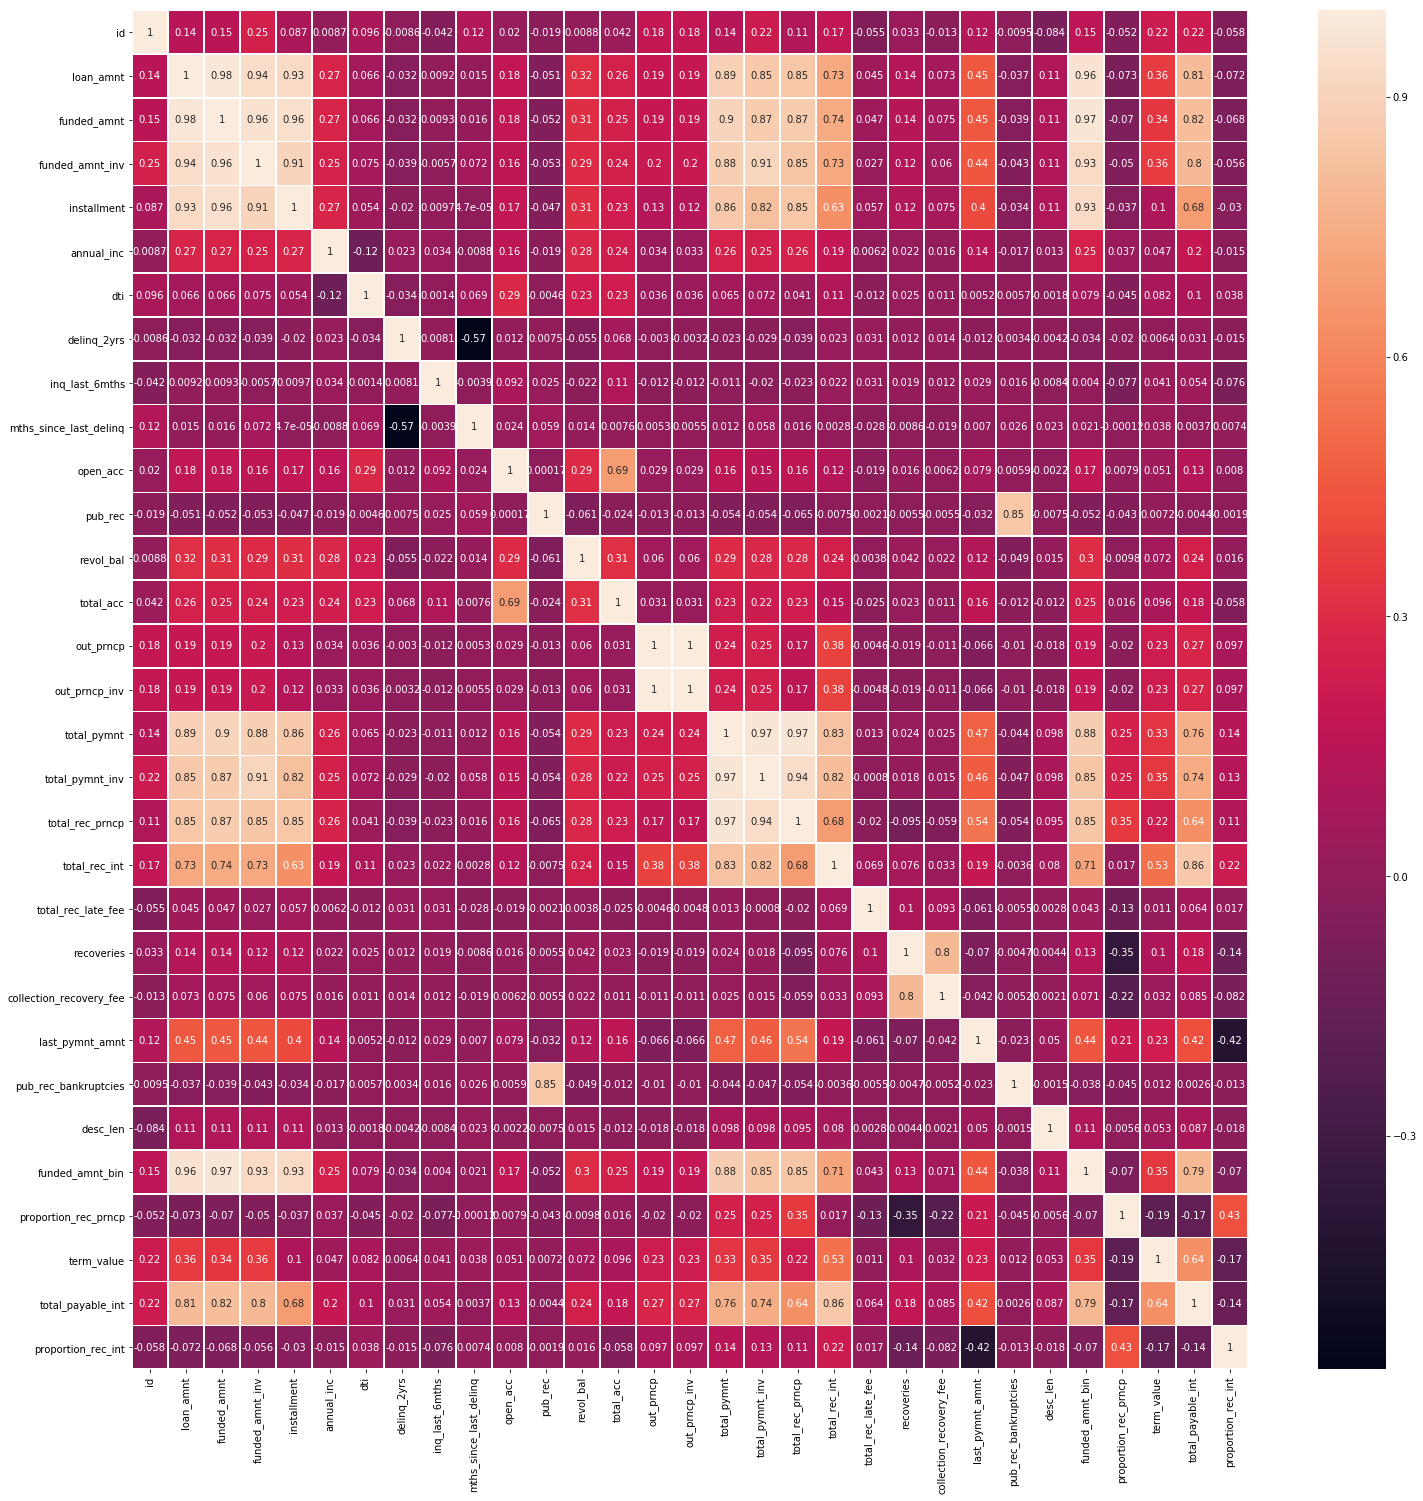

In [54]:
try:
    CorrelationMatrix=loanDataset.corr()   
    CorrelationMatrix.dropna(axis=1,how='all',inplace=True)
    print(loanDataset.shape)
    CorrelationMatrix.dropna(axis=0,how='all',inplace=True)
    plt.figure(figsize=(25,25))
    sns.heatmap(CorrelationMatrix,annot=True,linewidth=0.5)
except Exception as ex:
    print(ex)

Inferences from the correlation:

1. **total_pymnt_inv** has a very strong corrletaion to **total_pymnt (0.97)**. Hence, we must ignore this variable and consider only total_pymnt. 
2. **pub_rec_bankruptcies** correlates fairly strongly to **public_rec (0.86)**. Hence, we can take one among these
3. Our derived variable **proportion_rec_prncp** correlates very strongly to another derived variable **proportion_rec_int (0.93)**. So between principal and interest payment, we can choose only one.
4. Two derived variables **proportion_rec_prncp & proportion_late_fee** show slight negative correlation to funded_amnt. 

# Conclusions

1. **Verification_status** shows a trend that percentage of defaulters from total for Verified status is more compared to Non-Verified.
2. **Purpose** shows that the percntage of defaulter for 'Small_bussniness' is relatively are than all others puposes. Therefore this category of laoan are more likely to default.
3. **dti** column shows an increasing trend for the percentage of defaulters from 5 to 25. After which it stars decreasing. Therefore the higher dti range i.e. from 15 to 25 are more likely to default.
4. Most **last_pymnt_d** fall between year 2010-2013. In case of Fully Paid loans, most last_pymnt_d fall between 2013-2015. There might be some economic crisis during these periods. This is a very strong indicator of possible defaults / Charge Offs during economic crisis.
5. **emp_length** has a certain effect on loan status. From those with less and more experience the ratio of charged off to fully paid is low, where as for those in intermediate  phases the ratios are high
6. **grade** and **sub_grade** affect the loan status too.
7.  If the ticket size is high (~15000) and the **last_pymnt_amnt** < **installment**, there is a 18% probability that it may default. The company can take appropriate measures accordingly. Hence this attribute is important for the early detection of default
